In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf

data=pd.read_csv(r"C:/Users/Ertuğrul/Desktop/Veri Bilimi ve Makine Öğrenmesi (BTK)/Makine Öğrenmesi/veriler.csv")
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [71]:
E=data[data.cinsiyet=="e"]
K=data[data.cinsiyet=="k"]
data.cinsiyet=[1 if each=="e" else 0 for each in data.cinsiyet]
data.head(15)
# result=[]
# for each in data.cinsiyet:
#     if each=="e":
#         result.append(1)
#     else:
#         result.append(0)

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,1
1,tr,125,36,11,1
2,tr,135,34,10,0
3,tr,133,30,9,0
4,tr,129,38,12,1
5,tr,180,90,30,1
6,tr,190,80,25,1
7,tr,175,90,35,1
8,tr,177,60,22,0
9,us,185,105,33,1


In [72]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
country_encoded=ohe.fit_transform(data[["ulke"]])

country_encoded_df=pd.DataFrame(data=country_encoded.toarray(),columns=["country1","country2","country3"])

newdata=pd.concat([data,country_encoded_df],axis=1)
newdata=newdata.drop(["ulke"],axis=1)
newdata=newdata[["boy","kilo","yas","country1","country2","country3","cinsiyet"]]
newdata.head()




,boy,kilo,yas,country1,country2,country3,cinsiyet
0,130,30,10,0.0,1.0,0.0,1
1,125,36,11,0.0,1.0,0.0,1
2,135,34,10,0.0,1.0,0.0,0
3,133,30,9,0.0,1.0,0.0,0
4,129,38,12,0.0,1.0,0.0,1


Veri setimi gerekli işlemleri yaparak ANN ile compile etmeye hazır hale getiriyorum... Ancak bu işlemleri yaptıktan sonra cinsiyet belirlemek için country'nin aslında gereksiz olduğu kanaatine varıyorum, boy kilo yaşa göre makineye öğretmemin daha doğru olacağı düşüncesindeyim, öğrenme amaçlı yaptığım için bu column'ları atma gereği duymadım sadece kullanmayacağım :)

In [73]:
x=newdata.iloc[:,0:3].values
y=newdata.cinsiyet.values

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Gizli katmanlarda genellikle input_dim'imizin yarısı kadar nöron veririz. Ancak tabii ki bu bir kural değil :)

In [76]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(3,activation="relu",input_dim=3)) #gizli katman 1

In [77]:
ann.add(tf.keras.layers.Dense(3,activation="relu")) #gizli katman 2
ann.add(tf.keras.layers.Dense(1,activation="sigmoid")) #çıkış katmanı, activation=sigmoid olurlar genellikle. 0 ile 1 arasında değer alırlar.


In [78]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [79]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10


1/1 [==============================] - 0s 476ms/step - loss: 0.8635 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8614 - accuracy: 0.2667
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8593 - accuracy: 0.2667
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8572 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8551 - accuracy: 0.3333
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8532 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.3333
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8493 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 0.8474 - accuracy: 0.3333
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8455 - accuracy: 0.3333


Amacım ANN'in nasıl kullanacağını görmekti, veri setimin çok uygun olmadığını zaten accuracy'nin hemen hemen hiç değişmemesinden de anlıyoruz :)

In [80]:
y_pred=ann.predict(x_test)
y_pred=(y_pred>0.5)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


1/1 [==============================] - 0s 68ms/step
[[2 4]
 [1 0]]


0.2857142857142857

Son olarak confusion_matrix ve accuracy_score kullanarak maksat işimizi sonuçlandırmış olalım ve kurduğumuz modelin başarılı olmadığını görelim. :)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

CNN ile konuyu öğrenirken aynı zamanda daha ciddi bir veri seti kullanalım.

**CNN**

**Convolutional Neural Network:**

-CNN'ler görüntü işleme ve desen tanıma gibi görsel veriler üzerinde başarılı sonuçlar elde etmek için kullanılan bir tür derin öğrenme modelidir.

-Temel olarak farklı evrişim katmanlarından ve toplama(pooling) katmanlarından oluşurlar.

-Evrişim katmanları, girdiye birer filtre uygulayarak, özellik haritalarını çıkartır. Bu sayede, giriş verisindeki özellikleri algılamaya yardımcı olurlar.

-Toplama katmanları,özellik haritalarının boyutunu azaltarak, hesaplama maliyetini azaltır ve özelliklerin translasyonel özelliğe karşı hassasiyetini azaltır.Translasyonel özelliğe karşı hassasiyeti azaltmak, CNN modellerinin nesneleri farklı konumlarda tanıyabilme yeteneğini arttırır.Bu nesnelerin genellikle konumlarının değişebileceği gerçeğine dayanır.Örneğin bir köpeğin görüntüsü farklı pozisyonlarda olabilir ve modelin bu farklı pozisyonlardaki köpekleri tanıması beklenir.

-CNN'ler resim sınıflandırma, nesne tespiti, yüz tanıma ve benzeri görsel işleme görevlerinde yaygın olarak kullanılırlar.

In [84]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

Burada kullanılan ImageDataGenerator kütüphanesi, resimleri toplu olarak değil de sırasıyla teker teker yükleyerek belleğin daha iyi çalışmasını sağlamaktadır. ImageDataGenerator her seferinde bir resmi okuyarak o resim için öz nitelik haritası çıkaracaktır.

In [85]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
training_set=train_datagen.flow_from_directory("C:\\Users\\Ertuğrul\\Desktop\\Veri Bilimi ve Makine Öğrenmesi (BTK)\\Makine Öğrenmesi\\CNN-RNN-LSTM\\train",
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode="binary")

Found 20000 images belonging to 2 classes.


rescale:Görüntü piksellerinin ölçeklendirilmesini kontrol eder. 1./255 ifadesi, görüntü piksellerinin 0 ile 1 arasında olacak şekilde yeniden ölçeklenmesini sağlar.

rotation_range:Görüntüleri rastgele döndürme açısı aralığını belirler.genellikle 0 ila 45 derece arasında kullanılır.Daha büyük değerler, görüntülerin daha fazla döndürülmesine ve çeşitlendirilmesine yol açar.

width_shift_range ve height_shift_range: Görüntülerin yatay ve dikey yönde rastgele kaydırma aralığını belirler. Genellikle 0.1 ile 0.2 arasında bir değer kullanılır.

shear_range:Görüntüleri rastgele şekil değiştirme aralığını belirler.genellikle   0.1-0.2 aralığı

zoom_range:Görüntüleri rastgele yakınlaştırma ve uzaklaştırma aralığını belirler. Genellikle 0.1-0.2 aralığı.

horizontal_flip ve vertical_flip:Görüntülerin yatay veya dikey olarak rastgele çevrilip çevrilmeyeceğini belirler.

fill_mode:Görüntülerin dönüştürdükten veya genişlettikten sonra oluşan boş piksellerin nasıl doldurulacağını belirler.genellikle nearest veya constant olarak belirlenir. nearest, boşlukları en yakın komşu piksel değerleriyle doldurur. constant, belirtilen bir sabit değerle doldurur.




In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory("C:\\Users\\Ertuğrul\\Desktop\\Veri Bilimi ve Makine Öğrenmesi (BTK)\\Makine Öğrenmesi\\CNN-RNN-LSTM\\test",
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode="binary")

Found 5000 images belonging to 2 classes.


------------------------------------ flow_from_directory parametreleri:

target_size:Görüntülerin hedef boyutunu belirtir.Genellikle (height,width) şeklinde bir tuple olarak verilir.

batch_size: Her bir eğitim döngüsünde işlenecek örnek sayısını belirtir.

class_mode:Veri setinin sınıflandırma tipini belirtir.Sınıflandırma yapıalcaksa "binary" veya "categorical" olarak belirtilir.

shuffle:Veri setinin karıştırılıp karıştırılmayacağını belirtir.Genellikle True olarak ayarlanır.

In [ ]:
cnn=tf.keras.models.Sequential()

**1-Convolutional**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu",input_shape=[64,64,3]))

**Conv2D katmanı parametreleri:**

filters: kullanılan filtre sayısını belirtir.filtreler, görüntü üzerinde belirli özellikleri yakalamak için kullanılır.Her bir filtre girdideki farklı özellikleri algılamaya çalışır. Bu sayı yükseldikçe modelin karmaşık özellikleri öğrenme yeteneği artacaktır ancak filtre arttıkça da daha büyük hesaplama gücü ortaya çıkmış olacaktır.

kernel_size:kullanılan filtrenin boyutu. 3x3'lük filtre kullanılmış.

activation: aktivasyon fonksiyonunu belirtir.relu, pozitif girişleri doğrudan geçirirken negatif girişleri sıfıra eşitler.

input_shape:girdi görüntüsünün boyutunu belirtir. 64*64 boyutunda ve 3 kanallı(RGB)bir görüntü kullanıldığını gösterir.modelin yalnızca ilk katmanında kullanılır ve geri kalan katmanlar bu şekil bilgisini otomatik olarak alır.

**2-Pooling**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

pool_size: pooling işleminde kullanılan pencerenin boyutunu belirtir. =2 ifadesi, 2x2 boyutunda bir pencerenin kullanıldığını gösterir.

strides: Bu parametre, pooling işleminin kaç birimle kaydıralacağını belirtir. =2 ifadesi, pooling işleminin her iki boyutta da 2 birimle kaydıralacağını gösterir. strides(1,2) gibi bir şey yaparsak dikeyde 1 yatayda 2 birim kaydırmış oluruz


**3-İkinci convolutional katman ve pooling**


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

**4-Flattening**


In [ ]:
cnn.add(tf.keras.layers.Flatten())

**5-Full Connection**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

Kaç katman olacağı units metodu ile 128 olarak belirlenmiştir.Buradaki parametre resimler 64x64 boyutunda olduğu için 128 olarak belirlenmiştir.

**6-Çıkış Katmanı**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

**Derleme İşlemi**

In [ ]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

compile yöntemi, bir derin öğrenme modelini eğitirken kullanılacak bazı temel parametreleri belirtmeyi sağlar.

optimizer:modelin güncelleme stratejisini belirtir.Optimizasyon algoritması, modelin ağırlıklarını ve bias'larını nasıl güncelleyeceğini kontrol eder."adam"(Adaptive Moment Estimation) en popüler ve sık kullanılan optimizasyon algoritmalarındandır.Adam, adaptif öğrenme hızı(learning rate) ve momentum kavramlarını birleştirerek modelin daha hızlı ve etkili öğrenmesini sağlar.
Diğer optimizerler arasında "sgd"(Stochastic Gradient Descent), "rmsprop"(Root Mean Square Propagation) ve "adamax" bulunur.

loss:Modelin eğitim sırasında optimize edeceği kaybı loss fonksiyonunu belirtir.Kayıp fonksiyonu modelin tahminlerini gerçek etiketlerle karşılaştırarak hatayı ölçer ve geriye doğru yayılarak ağırlıkların güncellenmesini sağlar."binary_crossentropy"  sınıflandırma problemleri için sıklıkla kullanılan bir kayıp fonksiyonudur. "categorical_crossentropy" ise çok sınıflı sınıflandırma problemleri için kullanılır. diğer kayıp fonk: "mean_squared_error","mean_absolute_error"

metrics:modelin eğitim ve değerlendirme sırasında izlenecek performans metriklerini belirtir. accuracy, sınıflandırma problemlerinde yaygın kullanılan metriktir. diğer metrikler; precision(kesinlik),recall(duyarlılık), f1score ve auc(alan altında kalan).

**Eğitim işlemi**

In [ ]:
cnn.fit(x=training_set, validation_data=test_set,epochs=50)

Epoch 1/50
625/625 [==============================] - 360s 574ms/step - loss: 0.6259 - accuracy: 0.6435 - val_loss: 0.5443 - val_accuracy: 0.7156
Epoch 2/50
625/625 [==============================] - 143s 229ms/step - loss: 0.5303 - accuracy: 0.7370 - val_loss: 0.5006 - val_accuracy: 0.7494
Epoch 3/50
625/625 [==============================] - 147s 235ms/step - loss: 0.4837 - accuracy: 0.7663 - val_loss: 0.4674 - val_accuracy: 0.7770
Epoch 4/50
625/625 [==============================] - 148s 237ms/step - loss: 0.4544 - accuracy: 0.7866 - val_loss: 0.4723 - val_accuracy: 0.7728
Epoch 5/50
625/625 [==============================] - 142s 226ms/step - loss: 0.4316 - accuracy: 0.8003 - val_loss: 0.4219 - val_accuracy: 0.7978
Epoch 6/50
625/625 [==============================] - 146s 234ms/step - loss: 0.4145 - accuracy: 0.8081 - val_loss: 0.4326 - val_accuracy: 0.7950
Epoch 7/50
625/625 [==============================] - 145s 231ms/step - loss: 0.3991 - accuracy: 0.8183 - val_loss: 0.4194 -

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
image_paths=["prediction\\cat1.jpg",
             "prediction\\cat2.jpg",
             "prediction\\cat3.jpg",
             "prediction\\dog1.jpg",
             "prediction\\dog2.jpg",
             ]
predictions=[]
for path in image_paths:
    test_image=image.load_img(path,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image,axis=0)
    result=cnn.predict(test_image)
    training_set.class_indices
    if result[0][0]>=0.5:
        predictions.append("dog")
    else:
        predictions.append("cat")

1/1 [==============================] - 0s 15ms/step


image.load_img() ve image.img_to_array() işlevlerini kullanarak bir görüntüyü yükleyip diziye dönüştürüyoruz. np.expand_dims ifadesi, test_image dizisine boyut ekler. bu boyutu axis=0 dediğimiz için 0.boyuta ekler.
CNN modelleri genellikle bir dizi görüntüyü işler ve bu diziye "batch" denir.CNN modelleri için girdi verileri 4 boyutlu bir tensör olarak şekillenir. np.expand_dims ile boyut ekleriz ve şekli(1,64,64,3) olur.Bu şekilde, tek bir görüntüyü temsil eden bir batch oluştururuz ve modelin işleyebileceği girdi formatını sağlamış oluruz.
batch, bir seferde işlenen örneklerin gruplarını ifade eder ve modelin daha verimli çalışmasına yardımcı olur.
class_indices özelliği, eğitim veri setindeki sınıf etiketleri ile sayısal sınıf indeksleri arasındaki eşleştirmeyi içeren bir sözlük döndürür. Bu, tahmin sonuçlarını yorumlamak için kullanılır.

In [ ]:
print(predictions)

['cat', 'cat', 'dog', 'dog', 'dog']


5 fotoğraftan birini bilemedi :) Verdiğim fotoğrafların hiçbiri training veya test'e ait fotoğraflar değildi, ayrıca gürültüsü yüksek fotoğraflar seçmiş olmama rağmen 4/5 güzel başarı oranı :)

**RNN (RECURRENT NEURAL NETWORK):**
- RNN'ler dizisel verileri(metin,ses vb.) işlemek ve bu veriler arasındaki bağıntıları modellemek için kullanılan bir tür derin öğrenme modelidir.
- RNN'ler geri besleme döngüleri sayesinde geçmiş bilgileri hatırlayabilirler ve bu nedenle zamansal bağıntıları modelleme yetenekleri vardır.
- Tipik olarak, girdi verileri RNN hücrelerine(genellikle LSTM veya GRU hücreleri kullanılır) aktarılır ve her adımda bir sonraki adıma bir çıktı ve bir hücre durumu üretirler.
- RNN'ler, dil modellemesi, metin üretimi, zaman serisi tahmini ve duygu analizi gibi dizisel veriler üzerinde yapısal tahminler yapmak için kullanılırlar.
- Diğer sinir ağlarından en büyük 2 farkı, RNN'in geçmiş adımlarını hatırlaması ve diğer sinir ağlarının girdileri birbirinden bağımsızken RNN'lerde girdiler birbirleriyle ilişkilidir.
- Kendi içerisinde de işlemer yapıldığı için, genelde çok derin RNN yapıları kurulmaz.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import imdb 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Activation


In [87]:
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(path="ibdb.npz",num_words=None,  #indirdiği dosyayı numpy zip olarak sıkıştırır.
               skip_top=0,maxlen=None,seed=113,start_char=1,oov_char=2,index_from=3)          

skip_top=50 deseydik, en çok kullanılan kelimeler listesindeki ilk 50 kelimeyi atlamış olurduk.

maxlen=Oluşturulan dizinin maksimum uzunluğu, None yapıyoruz ve hepsini alıyoruz.

seed= bu parametreyi belirleyerek,veri kümersinin karıştırılması için kullanılan rastgelelik kontrol edilebilir.Aynı seed değeri kullanıldığında, her çalıştırmada aynı veri kümesi karıştırma sırası oluşur.

start_char=1 olarak ayarlanmıştır. Bu, metin dizilerinin başına başlangıç karakterini eklemek için kullanılır. Başlangıç karakteri, belirli bir modelin özel bir sembol veya işaretlemeyi temsil edebilir.

oov_char parametresi, veri setinde bulunmayan kelimeleri temsil etmek için kullanılan bir özel sembolün indeksini belirtir. Buradaki "veri setinde bulunmayan kelimeler" ifadesi, eğitim veri setindeki kelime sözlüğünde (vocabüler) bulunmayan kelimeleri ifade eder.

index_from parametresi, indekslemeye başlama değerini belirtir. Varsayılan olarak, index_from=3 olarak ayarlanmıştır. Bu, indekslemeye sıfır yerine belirli bir değerden başlamak için kullanılır. Örneğin, index_from=3 olduğunda, kelime indeksleri 3'ten başlar ve 0 ve 1 indeksli özel semboller (başlangıç karakteri ve OOV karakteri) için ayrılır.

In [88]:
print(len(xtrain))
print(len(ytrain))
print(type(xtrain))
print(xtrain.shape)

25000
25000
<class 'numpy.ndarray'>
(25000,)


In [89]:
print(ytrain[3]) #ytrain içerisinde tahmin verilerinin sonucu var 0:olumsuz, 1:olumlu
print(np.unique(ytrain))


1
[0 1]


In [90]:
unique,counts=np.unique(ytrain,return_counts=True) #return_counts=True, her benzersiz değerin kaç kez tekrarlandığını hesaplar
print(dict(zip(unique,counts)))
#zip() fonksiyonu, unique ve counts dizilerini birleştirir ve her bir benzersiz değeri ve
#tekrar sayısını içeren bir çift oluşturur. dict() bu çiftleri bir sözlüğe dönüştürür

{0: 12500, 1: 12500}


Text(0.5, 1.0, 'ytrain')

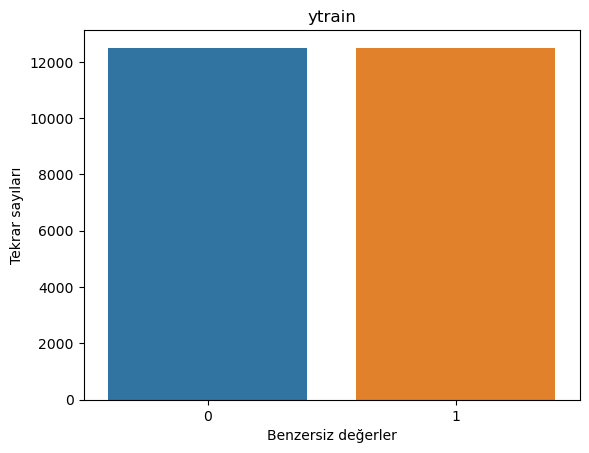

In [91]:
plt.figure()
sns.countplot(x=ytrain)
plt.xlabel("Benzersiz değerler")
plt.ylabel("Tekrar sayıları")
plt.title("ytrain")

In [92]:
#train ve test verilerinde kaçar tane kelime var buna bakacağız.1.yorumun kelime sayısı,2.yorumun...vb)
review_len_train=[]
review_len_test=[]

for i,j in zip(xtrain,xtest):
    review_len_train.append(len(i))
    review_len_test.append(len(j))
review_len_test

[68,
 260,
 603,
 181,
 108,
 132,
 761,
 180,
 134,
 370,
 209,
 248,
 398,
 326,
 131,
 255,
 127,
 184,
 188,
 105,
 230,
 137,
 88,
 70,
 170,
 305,
 273,
 134,
 232,
 264,
 99,
 133,
 121,
 521,
 133,
 124,
 228,
 159,
 132,
 141,
 310,
 431,
 214,
 185,
 549,
 136,
 89,
 298,
 127,
 252,
 289,
 125,
 64,
 111,
 132,
 256,
 100,
 152,
 203,
 124,
 113,
 208,
 106,
 234,
 114,
 210,
 733,
 173,
 321,
 86,
 112,
 195,
 101,
 194,
 122,
 324,
 195,
 257,
 307,
 78,
 157,
 213,
 163,
 122,
 197,
 169,
 81,
 242,
 218,
 193,
 467,
 74,
 76,
 736,
 448,
 200,
 185,
 124,
 122,
 121,
 135,
 173,
 506,
 170,
 88,
 521,
 245,
 111,
 206,
 149,
 266,
 242,
 147,
 151,
 304,
 138,
 97,
 240,
 437,
 110,
 205,
 80,
 383,
 202,
 144,
 146,
 156,
 280,
 787,
 115,
 379,
 335,
 82,
 174,
 151,
 88,
 153,
 120,
 234,
 373,
 307,
 183,
 95,
 368,
 259,
 291,
 128,
 142,
 84,
 118,
 128,
 140,
 399,
 185,
 47,
 434,
 257,
 144,
 733,
 867,
 44,
 132,
 599,
 250,
 156,
 275,
 184,
 118,
 153,
 222,


distploat fonksiyonu, veri dağılımını görselleştirmek için kullanılır.histogram üzerine bir yoğunluk grafiği çizer.Yoğunluk grafiği, veri kümesinin dağılımını daha yumuşak bir şekilde gösterir ve histogramla birlikte kullanıldığında verinin dağılımını daha iyi anlamamıza yardımcı olur.
hist_kws, histogramın opaklığını(alpha) ayarlamak için kullanılır.

C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_23020\3009079399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_train,hist_kws={"alpha":0.3})
C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_23020\3009079399.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_test,hist_kw

<Axes: ylabel='Density'>

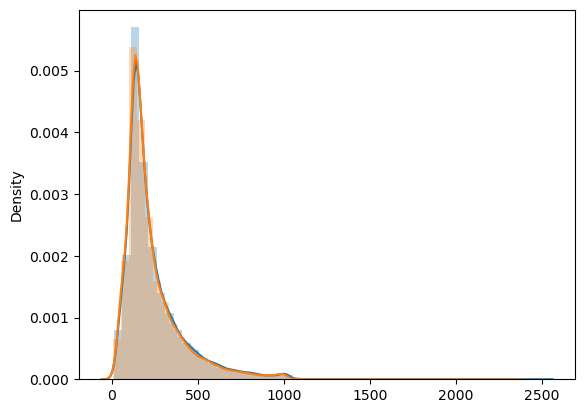

In [ ]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3})
sns.distplot(review_len_test,hist_kws={"alpha":0.3})

mod,medyan,mean değerlerini kullanarak veri setini yorumlayalım.

In [ ]:
print("xtrain mean: ",np.mean(review_len_train))
print("xtrain median: ",np.median(review_len_train))
print("xtest mean: ",np.mean(review_len_test))
print("xtest median: ",np.median(review_len_test))

xtrain mean:  238.71364
xtrain median:  178.0
xtest mean:  230.8042
xtest median:  174.0


In [ ]:
from scipy import stats
print("train mode: ",stats.mode(review_len_train))

train mode:  ModeResult(mode=array([132]), count=array([196]))


C:\Users\Ertuğrul\AppData\Local\Temp\ipykernel_23020\2869896472.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print("train mode: ",stats.mode(review_len_train))


ıkırpma işlemimizi yaparken 130 ile sınırlandıracaz, yani 5 kelimelik yorumda 500 kelimelik yorumu da 130a çekeceğiz.

In [ ]:
word_index=imdb.get_word_index() #dict
print(len(word_index))
word_index["the"]

88584


1

In [ ]:
for keys,values in word_index.items():
    if values==2:
        print(keys)

and


In [ ]:
def whatis(index):
    reverse_index=dict([(value,key)for (key,value) in word_index.items()])
    decode_review=" ".join([reverse_index.get(i-3,"!") for i in xtrain[index]])
    print(ytrain[index])
    return decode_review 

In [ ]:
decoded_review=whatis(5)

decoded_review


0


"! begins better than it ends funny that the russian submarine crew outperforms all other actors it's like those scenes where documentary shots br br spoiler part the message dechifered was contrary to the whole story it just does not mesh br br"

In [ ]:
num_words=15000
maxlen=130
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=num_words)
xtrain=pad_sequences(xtrain,maxlen=maxlen)
xtest=pad_sequences(xtest,maxlen=maxlen)
for i in xtrain[0:10]:
    print(len(i))


130
130
130
130
130
130
130
130
130
130


In [ ]:
rnn=Sequential()
rnn.add(Embedding(num_words,32,input_length=len(xtrain[0])))

rnn modeli oluşturduk.Embedding katmanı, kelime gömme işlemini gerçekleştirir.Kelimeleri sabit boyutlu sayısal vektörlere dönüştürerek kelime temsillerini öğrenir.

num_words, kullanılacak kelime sözlüğünün toplam kelime sayısını temsil eder.

32,gömme vektörlerinin boyutunu belirtir.Her bir kelimenin gömme vektörü 32 boyutlu olacaktır.

input_length,giriş dizilerinin uzunluğunu belirtir.metin örneklerinin sabit bir uzunluğa sahip olmasını sağlar.

  Embedding katmanı, metin verilerini sayısal temsillerine dönüştürmek için kullanılır. Bu sayısal temsiller, ardından RNN katmanında işlenebilir.

In [ ]:
rnn.add(SimpleRNN(16,input_shape=(num_words,maxlen),return_sequences=False,activation="relu"))

16 gizli birim içerir.

return_sequence=False parametresinde katman sadece son zaman adımında bir çıktı döndürür.Bu, bir sonraki katmana yalnızca son zaman adımındaki çıktının geçeceği anlamına gelir.Diğer zaman adımlarındaki çıktılar atılır ve yalnızca son zaman adımındaki çıktı kullanılır.

In [ ]:
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 32)           480000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480801 (1.83 MB)
Trainable params: 480801 (1.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history=rnn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=5,batch_size=128,verbose=1)

Epoch 1/5
196/196 [==============================] - 5s 20ms/step - loss: 0.6021 - accuracy: 0.6848 - val_loss: 0.4514 - val_accuracy: 0.8280
Epoch 2/5
196/196 [==============================] - 4s 21ms/step - loss: 0.4028 - accuracy: 0.8310 - val_loss: 0.3870 - val_accuracy: 0.8402
Epoch 3/5
196/196 [==============================] - 4s 20ms/step - loss: 0.3238 - accuracy: 0.8672 - val_loss: 0.3315 - val_accuracy: 0.8598
Epoch 4/5
196/196 [==============================] - 4s 21ms/step - loss: 0.2835 - accuracy: 0.8849 - val_loss: 0.3764 - val_accuracy: 0.8416
Epoch 5/5
196/196 [==============================] - 4s 21ms/step - loss: 0.2510 - accuracy: 0.9006 - val_loss: 0.3374 - val_accuracy: 0.8516


In [ ]:
score=rnn.evaluate(xtest,ytest)
print("accuracy: ",score[1]*100)

782/782 [==============================] - 3s 3ms/step - loss: 0.3374 - accuracy: 0.8516
accuracy:  85.15599966049194


{'loss': [0.6020887494087219,
  0.40282487869262695,
  0.3238118886947632,
  0.28346964716911316,
  0.2509884834289551],
 'accuracy': [0.6848400235176086,
  0.8310400247573853,
  0.8672000169754028,
  0.884880006313324,
  0.900600016117096],
 'val_loss': [0.45143815875053406,
  0.38703155517578125,
  0.3315424621105194,
  0.37640780210494995,
  0.3374091386795044],
 'val_accuracy': [0.828000009059906,
  0.8402000069618225,
  0.8598399758338928,
  0.8416000008583069,
  0.8515599966049194]}

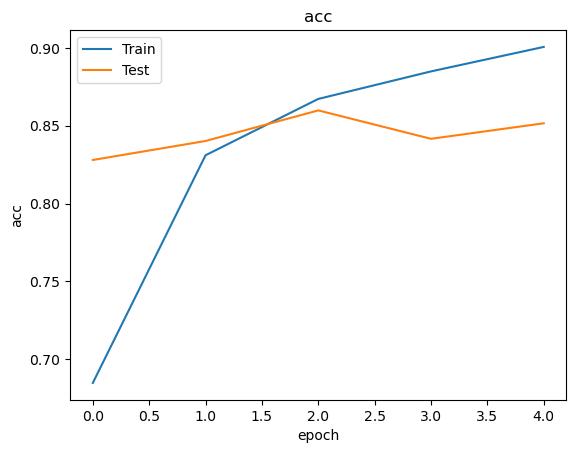

In [83]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.title("acc")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()
history.history

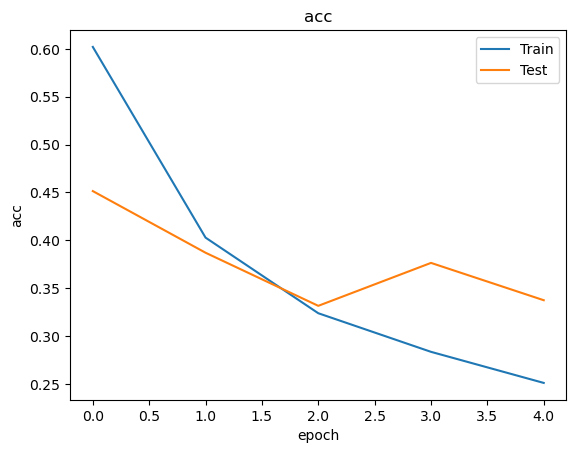

In [69]:
plt.figure()
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.title("acc")
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()